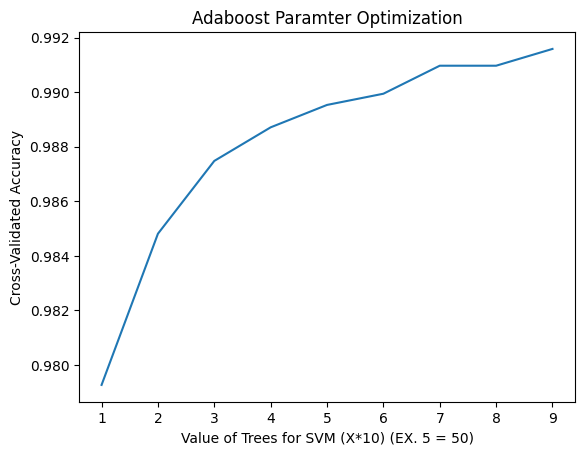

Adaboost-----------------------------------------------------
Optimum Tree (N estimators) Value for Adaboost based on cross validation is  90
Mean Cross Validation Accuracy =  0.9915844784920761
Training Time  33.603692370999994
Training Time  0.039942532000011965
confusion matricx for Adaboost  [[1238    4]
 [   4  379]]
Test Accuracy for Adaboost  0.9950769230769231


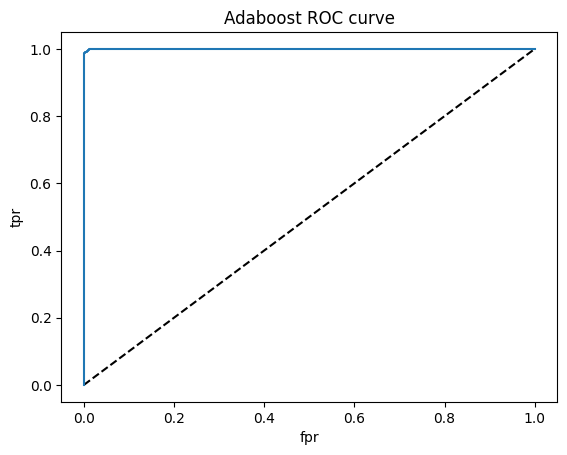

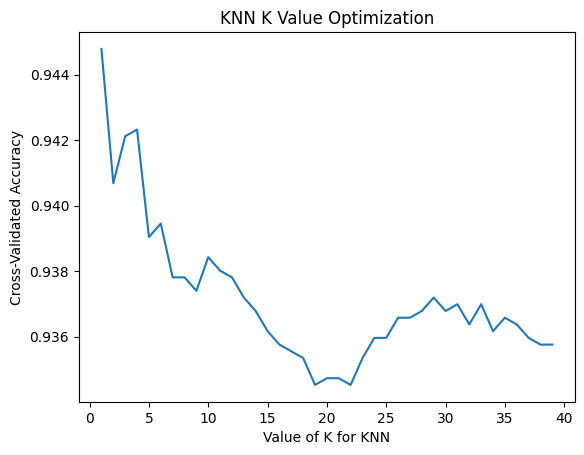

KNN-----------------------------------------------------
Optimum K Value for KNN based on cross validation is  1
Mean Cross Validation Accuracy =  0.9447887116306009
Training Time  15.01002917000001
Training Time  0.07186265300001082
confusion matricx for KNN  [[1182   60]
 [  35  348]]
Test Accuracy for KNN  0.9415384615384615


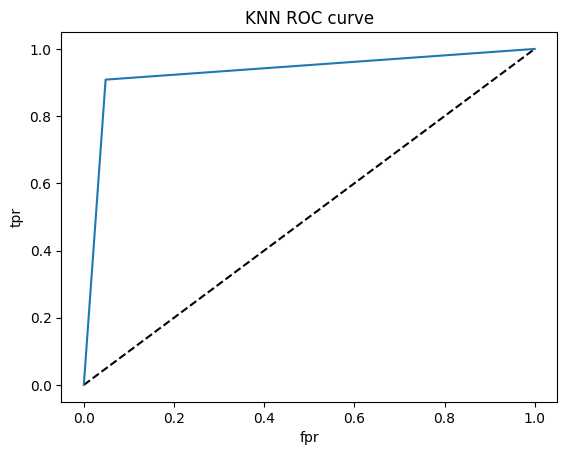

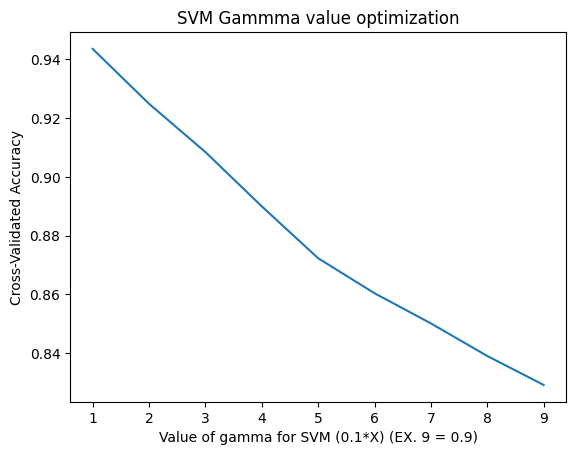

SVM-----------------------------------------------------
Optimum gamma Value for SVM based on cross validation is  0.1
Mean Cross Validation Accuracy =  0.9435577317959248
Training Time  56.79535172299998
Training Time  0.09549239000000398
confusion matricx for SVM  [[1215   27]
 [  64  319]]
Test Accuracy for SVN  0.944


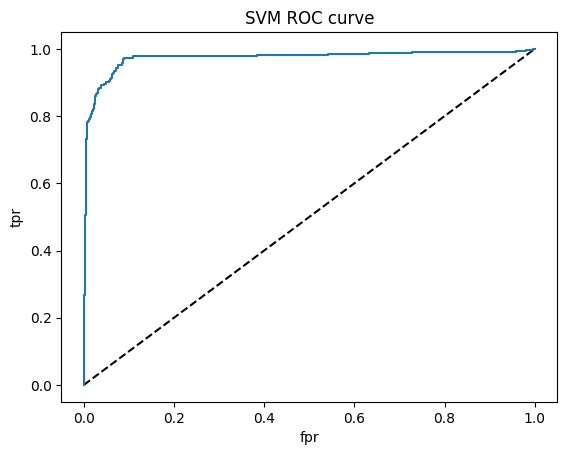

In [ ]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Thu May 11 22:13:28 2023

@author: gurmanjohal
"""

#SETUP -------------------------------------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
import timeit
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import sklearn
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics


#load dataset
df=pd.read_csv("winequality-white.csv")
x = df.drop(columns=['quality','0RED/1WHITE'])
y = df['0RED/1WHITE']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25)


#test if data is imported correctly
#print (df.describe())


#Classifier 3: Adaboost -------------------------

k_range = range(1, 10)
k_scores = []

ticTrain=timeit.default_timer()

for k in k_range:
    abc = AdaBoostClassifier(n_estimators=k*10,learning_rate=1)
    scores = sklearn.model_selection.cross_val_score(abc, X_train, y_train, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())
tocTrain=timeit.default_timer()

# plot to see clearly
plt.figure(5)
plt.plot(k_range, k_scores)
plt.title("Adaboost Paramter Optimization")
plt.xlabel('Value of Trees for SVM (X*10) (EX. 5 = 50)')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

Toptim = (k_scores.index(max(k_scores)) + 1)*10

abc = AdaBoostClassifier(n_estimators=Toptim,learning_rate=1)
model = abc.fit(X_train, y_train)
ticTest=timeit.default_timer()
y_pred = model.predict(X_test)
tocTest=timeit.default_timer()

cm = confusion_matrix(y_test, y_pred)

print("Adaboost-----------------------------------------------------")
print("Optimum Tree (N estimators) Value for Adaboost based on cross validation is ", Toptim)
print("Mean Cross Validation Accuracy = ", max(k_scores))
print ('Training Time ', tocTrain - ticTrain)
print ('Training Time ', tocTest - ticTest)
print('confusion matricx for Adaboost ',cm)
print('Test Accuracy for Adaboost'' ', accuracy_score(y_test, y_pred))

#ROC

#ROC Curve
y_pred_proba = abc.predict_proba(X_test)
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:,1])
plt.figure(6)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Adaboost')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Adaboost ROC curve')
plt.show()

# Classifier 1: KNN  --------------------------------------------
# source 1: https://medium.com/@svanillasun/how-to-deal-with-cross-validation-based-on-knn-algorithm-compute-auc-based-on-naive-bayes-ff4b8284cff4

k_range = range(1, 40)
k_scores = []

# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
ticTrain=timeit.default_timer()
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = sklearn.model_selection.cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())
tocTrain=timeit.default_timer()

# plot to see clearly
plt.figure(1)
plt.plot(k_range, k_scores)
plt.title('KNN K Value Optimization')
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

Koptim = k_scores.index(max(k_scores)) + 1


print("KNN-----------------------------------------------------")
print("Optimum K Value for KNN based on cross validation is ", Koptim)
print("Mean Cross Validation Accuracy = ", max(k_scores))

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=Koptim)
classifier.fit(X_train, y_train)

# Predicting the Test set results
ticTest=timeit.default_timer()
y_pred = classifier.predict(X_test)
tocTest=timeit.default_timer()

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)

toc=timeit.default_timer()
print ('Training Time ', tocTrain - ticTrain)
print ('Training Time ', tocTest - ticTest)
print('confusion matricx for KNN ',cm)
print('Test Accuracy for KNN'' ', accuracy_score(y_test, y_pred))

#ROC Curve
y_pred_proba = classifier.predict_proba(X_test)
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:,1])
plt.figure(2)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('KNN ROC curve')
plt.show()



#Classifier 2: SVM -----------------------------
k_range = range(1, 10)
k_scores = []

ticTrain=timeit.default_timer()

for k in k_range:
    clf = SVC(kernel='rbf', gamma=k/10)
    scores = sklearn.model_selection.cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())
tocTrain=timeit.default_timer()

# plot to see clearly
plt.figure(3)
plt.title('SVM Gammma value optimization')
plt.plot(k_range, k_scores)
plt.xlabel('Value of gamma for SVM (0.1*X) (EX. 9 = 0.9)')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

Goptim = (k_scores.index(max(k_scores)) + 1)/10

clf = SVC(kernel='rbf', gamma=Goptim/10)
clf.fit(X_train, y_train)

ticTest=timeit.default_timer()
y_pred = clf.predict(X_test)
tocTest=timeit.default_timer()

cm = confusion_matrix(y_test, y_pred)


print("SVM-----------------------------------------------------")
print("Optimum gamma Value for SVM based on cross validation is ", Goptim)
print("Mean Cross Validation Accuracy = ", max(k_scores))
print ('Training Time ', tocTrain - ticTrain)
print ('Training Time ', tocTest - ticTest)
print('confusion matricx for SVM ',cm)
print('Test Accuracy for SVN'' ', accuracy_score(y_test, y_pred))


y_pred= clf.decision_function(X_test)
svm_fpr, svm_tpr, threshold = roc_curve(y_test, y_pred)


plt.figure(4)
plt.plot([0,1],[0,1],'k--')
plt.plot(svm_fpr, svm_tpr, linestyle='-', label = "SVM")
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('SVM ROC curve')
plt.show()


